In [2]:
import sys 
sys.path.append('..')

In [3]:
import electrode2currentmap as e2cm
from importlib import reload
reload(e2cm)

<module 'electrode2currentmap' from '../electrode2currentmap.py'>

In [4]:
rm axon.npz

rm: cannot remove ‘axon.npz’: No such file or directory


In [5]:
r = e2cm.Retina(axon_map='axon.npz')

Can't find file axon.npz, generating


In [6]:
r.axon_weight

[[1,
  0.96925606782415885,
  0.93949953478483417,
  0.88281732002504887,
  0.85582882146470762,
  0.80440813605369577,
  0.77991947697700603,
  0.73325162767073804,
  0.68949521997839647,
  0.66864909981544918,
  0.62890873600257202,
  0.60997187902043781,
  0.57386371258016822,
  0.55665402664295682,
  0.52383237783014336,
  0.49302674712623595,
  0.47833925251419984,
  0.45031830951693735,
  0.43695576895051874,
  0.41145746828353602,
  0.39929546385200687,
  0.37608341362578063,
  0.36500968177595744,
  0.34387053491808478,
  0.32400511367604595,
  0.31452485367838634,
  0.2964217414601229,
  0.28778083131027032,
  0.27127737822521331,
  0.26339851087696231,
  0.24834768202738658,
  0.23419058439070681,
  0.22742977477690193,
  0.21451078656257389,
  0.20834010871501354,
  0.1965466505227694,
  0.19091255283848632,
  0.18014269125233986,
  0.17000337821606812,
  0.16515807740095997,
  0.15589333876369657,
  0.15146562385960663,
  0.1429998994806318,
  0.13895381548198377,
  0.13121

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

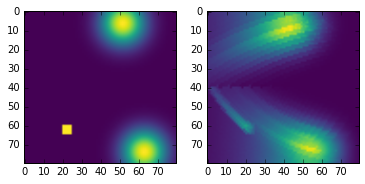

In [8]:
# made-up current map
xg = e2cm.micron2deg(r.gridx)
yg = e2cm.micron2deg(r.gridy)

cm = np.exp(-((xg-1)**2+(yg+3)**2)/1)
cm[60:65,20:25]= 1

cm[50:60,80:90]= 1
cm = cm + np.exp(-((xg-2)**2+(yg-3)**2)/1)

# show the currrent map as an image
plt.subplot(1,2,1)
plt.imshow(cm,cmap = 'viridis')

# pass the current map through the axon map
ecm = r.cm2ecm(cm)
plt.subplot(1,2,2)
plt.imshow(ecm, cmap = 'viridis')
